In [3]:
## For data manupilation
import numpy as np
import pandas as pd
# For os
import os
# remove warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
os.chdir("D:\\data analyst data\\download data\\Mall Customer Segmentation Data")
os.listdir()

['Mall_Customers.csv']

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum() # checking if there is any null value 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.rename(columns= {'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)

In [8]:
df.drop('CustomerID', axis = 1 ,inplace = True)

In [9]:
df.dtypes # checking data type 

Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

In [10]:
df.shape #checking shape of data 

(200, 4)

In [11]:
df.columns.values #checking columns 

array(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype=object)

In [12]:
# For creating colormaps
import matplotlib.pyplot as plt
import seaborn as sns
# for clustering 
from sklearn.cluster import KMeans
import time  # Measuring process time
from sklearn.preprocessing import StandardScaler #  For data processing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dt

In [13]:
np.min(df.Age), np.max(df.Age)

(18, 70)

<AxesSubplot:xlabel='Age'>

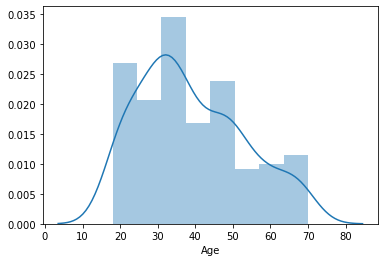

In [14]:
sns.distplot(df.Age) # diagrams 

In [15]:
sns.distplot(df.Annual_Income, hue = 'Gender')

TypeError: distplot() got an unexpected keyword argument 'hue'

In [ ]:
sns.distplot(df.Spending_Score)

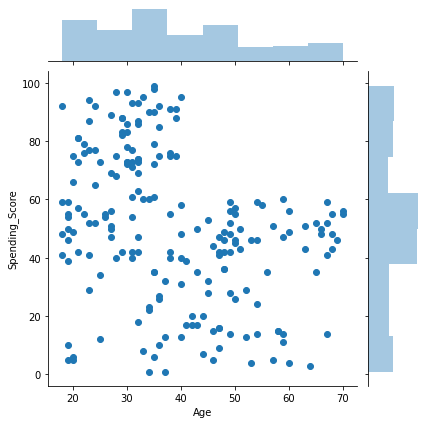

In [16]:
sns.jointplot(df.Age, df.Spending_Score)

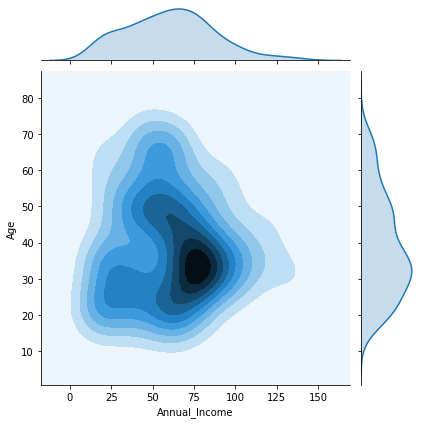

In [17]:
sns.jointplot(df.Annual_Income, df.Age , kind="kde")

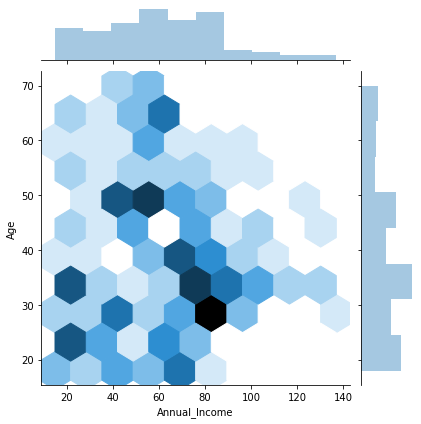

In [18]:
sns.jointplot(df.Annual_Income, df.Age , kind="hex")

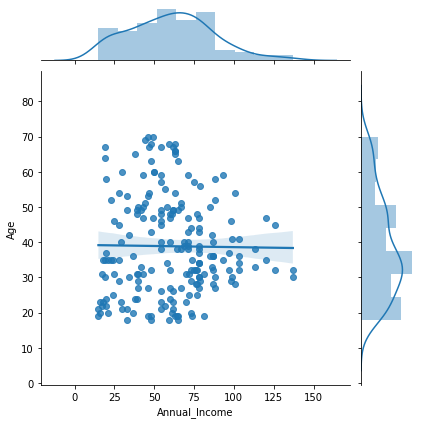

In [19]:
sns.jointplot(df.Annual_Income, df.Age , kind="reg")

In [20]:
cust_group = df.groupby(['Gender','Age']).sum().reset_index()
cust_group

,Gender,Age,Annual_Income,Spending_Score
0,Female,18,65,48
1,Female,19,128,104
2,Female,20,53,81
3,Female,21,179,253
4,Female,22,74,131
...,...,...,...,...
82,Male,66,63,48
83,Male,67,135,114
84,Male,68,63,43
85,Male,69,44,46


In [21]:
df['Annual_Income'].min()

15

In [22]:
df['Annual_Income'].max()

137

In [23]:
df['Annual_Income_cat'] = pd.cut(
                       df['Annual_Income'],
                       bins = 3,
                       labels= ['low', 'medium','high']
                      )
df

,Gender,Age,Annual_Income,Spending_Score,Annual_Income_cat
0,Male,19,15,39,low
1,Male,21,15,81,low
2,Female,20,16,6,low
3,Female,23,16,77,low
4,Female,31,17,40,low
...,...,...,...,...,...
195,Female,35,120,79,high
196,Female,45,126,28,high
197,Male,32,126,74,high
198,Male,32,137,18,high


<AxesSubplot:xlabel='Annual_Income_cat', ylabel='Age'>

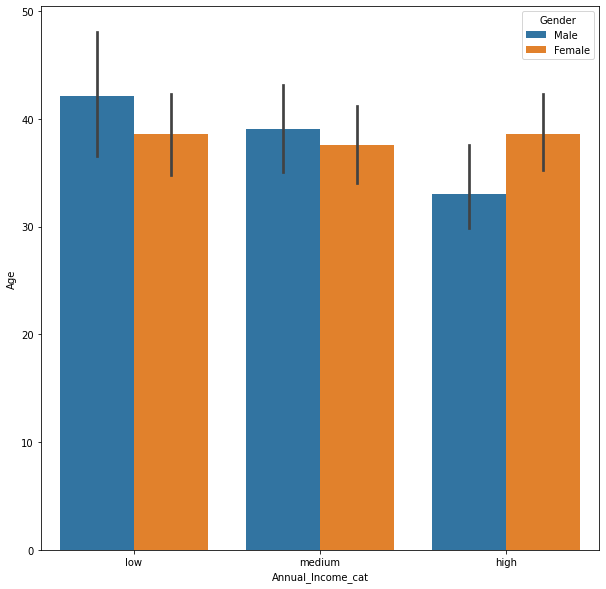

In [24]:
plt.figure(1 , figsize = (10 , 10))
sns.barplot(x = 'Annual_Income_cat', y = 'Age',hue = 'Gender', data = df, )

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

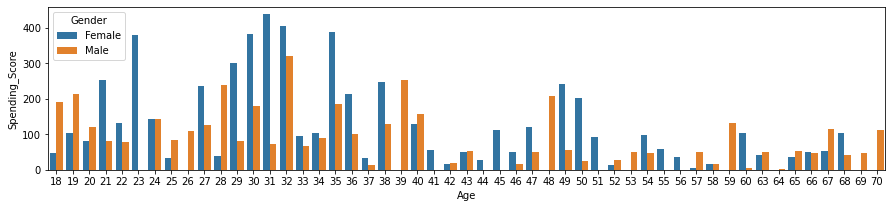

In [25]:
plt.figure(figsize=(15,3))
sns.barplot(data=cust_group,x='Age',y='Spending_Score',hue='Gender')

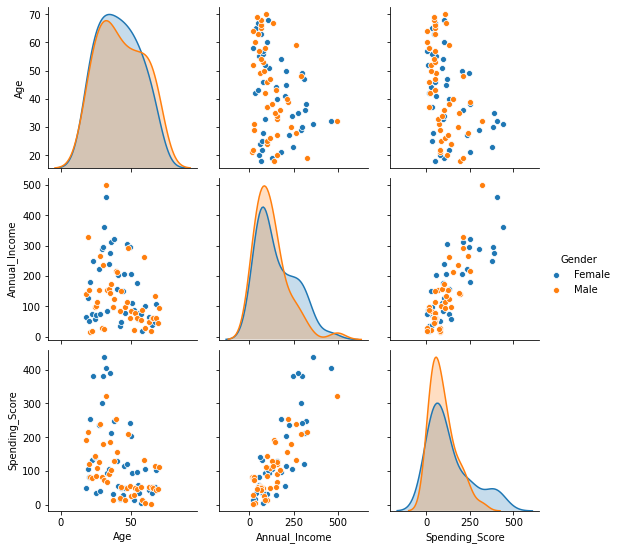

In [26]:
sns.pairplot(data=cust_group, hue='Gender')

In [27]:
df.drop(columns=['Annual_Income_cat'],inplace= True)  #Dropping columns not needed


In [28]:
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [29]:
from sklearn.preprocessing import LabelEncoder as le
enc=le()

In [31]:
df['Gender']=enc.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [32]:
find_cls=[]
for i in range(1,15):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df)
    find_cls.append(kmean.inertia_)


In [33]:
find_cls

[308862.06000000006,
 212889.44245524297,
 143391.59236035682,
 104422.8349853975,
 75399.61541401483,
 58350.65449462819,
 51167.19736842105,
 44391.820804870804,
 40639.66039466075,
 38155.6547077922,
 34263.246822676236,
 31722.97470429542,
 29854.97438050455,
 28154.692315609227]

<function matplotlib.pyplot.show(close=None, block=None)>

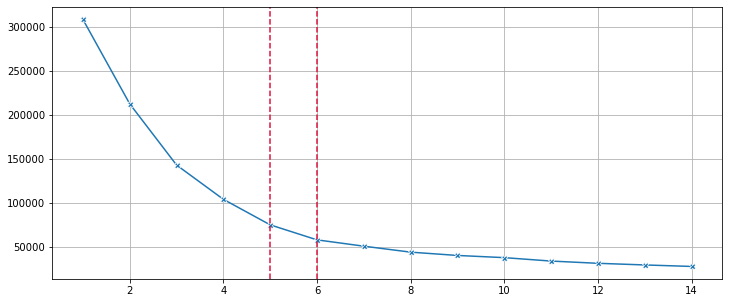

In [34]:
fig, axs = plt.subplots(figsize=(12,5))
sns.lineplot(range(1,15),find_cls, ax=axs,marker='X')
axs.axvline(5, ls="--", c="crimson") # CRIMSON is color, ls - line style
axs.axvline(6, ls="--", c="crimson")
plt.grid() #  square lines in back ground
plt.show

In [35]:
kmean=KMeans(n_clusters=5) # we found that best clusters are 5
kmean.fit(df)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
kmean.inertia_

75421.38291301334

In [37]:
kmean.cluster_centers_

array([[ 0.51351351, 40.32432432, 87.43243243, 18.18918919],
       [ 0.42307692, 43.28205128, 55.02564103, 49.69230769],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [38]:
clust_centers=kmean.cluster_centers_

In [39]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [40]:
kmean.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [41]:
df['center_cluster']=kmean.labels_

In [42]:
df

,Gender,Age,Annual_Income,Spending_Score,center_cluster
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


In [47]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.scatterplot(data = df, x = 'Age', y = 'Spending_Score', ax=ax1, hue = 'center_cluster',palette='Set1')  # good color use palette =1
sns.scatterplot(data = df, x='Annual_Income', y ='Spending_Score', ax=ax2, hue='center_cluster',palette='Set1')

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1080x360 with 2 Axes>

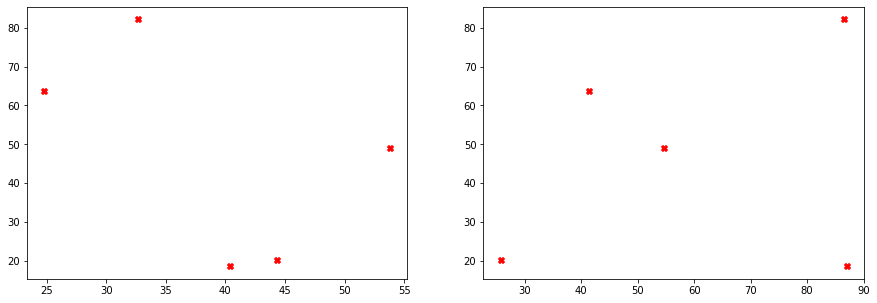

In [344]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(15,5))

ax1.scatter(kmean.cluster_centers_[:,1], kmean.cluster_centers_[:,3],marker='X',color='red')      
ax2.scatter(kmean.cluster_centers_[:,2], kmean.cluster_centers_[:,3],marker='X',color='red')

In [178]:
# Copy 'Age' column to another variable and then drop it
#     We will not use it in clustering
y = df['Age'].values
df.drop(columns = ['Age'], inplace = True)

In [179]:
y

array([32, 48, 60, 28, 48, 25, 18, 27, 49, 46, 21, 19, 29, 65, 60, 19, 59,
       54, 21, 25, 67, 46, 28, 50, 66, 47, 58, 33, 54, 50, 53, 28, 36, 38,
       18, 49, 18, 45, 49, 34, 32, 35, 32, 48, 38, 48, 31, 30, 39, 32, 22,
       40, 57, 20, 40, 31, 47, 23, 66, 67, 40, 32, 34, 36, 32, 32, 35, 47,
       20, 51, 41, 19, 35, 20, 67, 22, 70, 36, 38, 68, 27, 50, 36, 55, 21,
       24, 33, 52, 31, 56, 21, 32, 39, 41, 18, 35, 25, 40, 35, 46, 57, 35,
       20, 36, 54, 30, 31, 21, 42, 19, 19, 28, 23, 26, 19, 47, 45, 60, 52,
       30, 49, 29, 29, 33, 35, 47, 35, 36, 37, 37, 35, 19, 38, 30, 49, 30,
       27, 31, 44, 23, 27, 54, 70, 38, 67, 24, 49, 19, 20, 50, 43, 30, 42,
       24, 58, 31, 65, 32, 59, 40, 47, 68, 27, 34, 30, 69, 23, 44, 45, 43,
       32, 27, 49, 24, 34, 59, 26, 37, 34, 23, 40, 59, 29, 50, 32, 38, 63,
       53, 63, 31, 64, 29, 31, 68, 48, 22, 39, 23, 43, 51], dtype=int64)